# Scania truck dataset

### Import and prepare dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.set_style("darkgrid")

In [3]:
url='https://drive.google.com/file/d/1rj83vOoXgzm5wCKi5h3_NpfS_nWn7fny/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
train = pd.read_csv(url, skiprows=20)

In [4]:
train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [5]:
url='https://drive.google.com/file/d/1icOjXUNmA-ih6ltedODBwmL1-sI2Zqdi/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
test = pd.read_csv(url, skiprows=20)

In [6]:
test.shape

(16000, 171)

In [7]:
print(f"train dataset {train.shape}, test dataset {test.shape}")

train dataset (60000, 171), test dataset (16000, 171)


In [8]:
# merge train and test dataset
df = pd.concat([train, test])

In [9]:
df.shape

(76000, 171)

In [10]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [11]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


### Handle Null values

In [12]:
df.replace('na', np.nan, inplace=True)

In [13]:
# Total Null values
df.isnull().sum().sum()

1078695

In [14]:
# rows with null values
df[df.isnull().any(axis=1)].head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


<AxesSubplot: xlabel='features', ylabel='count'>

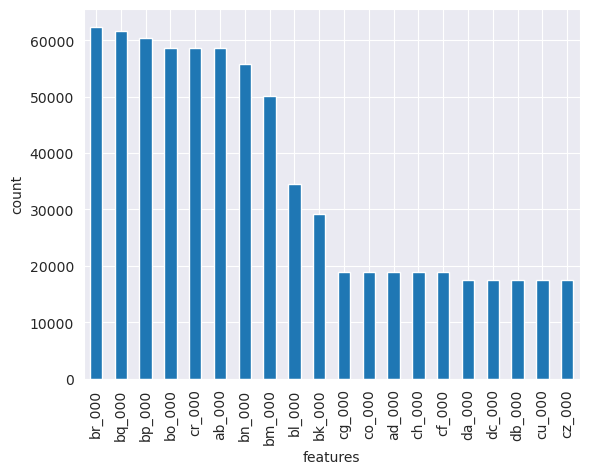

In [15]:
# features with maximum null values
df.isnull().sum().sort_values(ascending=False)[:20].plot(kind='bar', xlabel='features', ylabel='count')

In [16]:
# for col in [col for col in df.columns if col not in ['class']]:
#     df[col] = df[col].fillna(df[col].median)

In [17]:
# Only 1 column dtype is number
df.select_dtypes(include=np.number).head()

,aa_000
0,76698
1,33058
2,41040
3,12
4,60874


In [18]:
# Change dtype of all features except class to numeric
df.iloc[:,1:] = df.iloc[:,1:].apply(pd.to_numeric)

/tmp/ipykernel_70/2021326316.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1:] = df.iloc[:,1:].apply(pd.to_numeric)


In [19]:
df.select_dtypes(exclude=np.number).head()

,class
0,neg
1,neg
2,neg
3,neg
4,neg


In [20]:
df.isnull().sum().sum()

1078695

In [21]:
# Find feature wise percentage of null values
missing_percentage = df.isnull().sum().sort_values(ascending=False).div(df.shape[0]).mul(100)

In [22]:
missing_percentage

br_000    82.096053
bq_000    81.188158
bp_000    79.553947
bo_000    77.248684
cr_000    77.226316
            ...    
cj_000     0.557895
ci_000     0.557895
bt_000     0.256579
aa_000     0.000000
class      0.000000
Length: 171, dtype: float64

In [23]:
# Drop features with missing percentage > 50
missing_percentage = missing_percentage[missing_percentage.values > 40]

In [24]:
# Drop these features
missing_percentage

br_000    82.096053
bq_000    81.188158
bp_000    79.553947
bo_000    77.248684
cr_000    77.226316
ab_000    77.226316
bn_000    73.318421
bm_000    65.914474
bl_000    45.398684
dtype: float64

In [25]:
df.drop(missing_percentage.index, axis=1, inplace=True)

In [26]:
# Fill remaining null valus with median
df.fillna(df.median(), inplace=True)

/tmp/ipykernel_70/675963262.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


In [27]:
# Check null values
df.isnull().sum().sum()

0

### Graphical analysis

<AxesSubplot: xlabel='class', ylabel='count'>

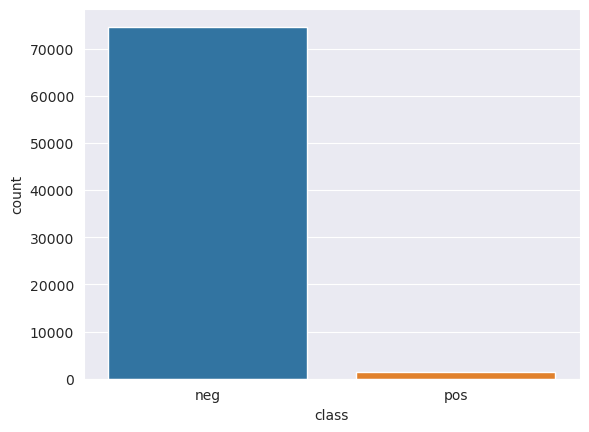

In [28]:
# count plot
sns.countplot(x='class', data=df)

- we have unbalanced data with less positive
- if our model give less performance the we will balance the data and then again make model

### Train/test split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
df['class'].unique()

array(['neg', 'pos'], dtype=object)

In [31]:
df['class'] = df['class'].map({'neg':0, 'pos':1})

In [32]:
X = df.drop('class', axis=1)
y = df['class']

In [33]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=32)

In [34]:
print("X_train row number :",X_train.shape[0])
print("X_test row number :",X_test.shape[0])
print("y_train row number :",y_train.shape[0])
print("y_test row number :",y_test.shape[0])

X_train row number : 50920
X_test row number : 25080
y_train row number : 50920
y_test row number : 25080


### Build model

In [36]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 11.3 MB/s eta 0:00:0000:0100:01


In [37]:
from sklearn.metrics import precision_score, confusion_matrix, roc_auc_score, recall_score, fbeta_score, accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [38]:
log_reg = LogisticRegression()
svc_rbf= SVC(kernel="rbf")
svc_poly =SVC(kernel="poly")
svc_sig = SVC(kernel="sigmoid")
rf_model = RandomForestClassifier() #bagging
ab_model = AdaBoostClassifier() #boosting
GB_model = GradientBoostingClassifier() #boosting
xg_model = XGBClassifier() #boosing
classifier = [log_reg, svc_rbf, svc_poly, svc_sig, rf_model, ab_model, GB_model, xg_model]

# creating a pipeline
from sklearn.pipeline import Pipeline

for c in classifier:
    pipe = Pipeline(steps = [('classifier', c)])
    pipe.fit(X_train, y_train)
    train_pred = pipe.predict(X_train)
    y_pred = pipe.predict(X_test)
    
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    
    print(f"Algorithm: {c}")
    print(f"Training accuracy {accuracy_score(y_train, train_pred)}")
    print(f"Accuracy: {accuracy}")
    print("precision: ", precision)
    print("reacll", recall)
    print(f"F1-Score: {f1score}")
    print("\n")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Algorithm: LogisticRegression()
Training accuracy 0.989120188531029
Accuracy: 0.9885964912280701
precision:  0.7097701149425287
reacll 0.5717592592592593
F1-Score: 0.6333333333333333


Algorithm: SVC()
Training accuracy 0.9829340141398272
Accuracy: 0.9838516746411483
precision:  0.8648648648648649
reacll 0.07407407407407407
F1-Score: 0.13646055437100213


Algorithm: SVC(kernel='poly')
Training accuracy 0.9817556952081696
Accuracy: 0.9827751196172249
precision:  0.5
reacll 0.013888888888888888
F1-Score: 0.02702702702702703


Algorithm: SVC(kernel='sigmoid')
Training accuracy 0.9832678711704634
Accuracy: 0.9838118022328549
precision:  0.5984848484848485
reacll 0.18287037037037038
F1-Score: 0.2801418439716312


Algorithm: RandomForestClassifier()
Training accuracy 1.0
Accuracy: 0.9937400318979266
precision:  0.9032258064516129
reacll 0.7129629629629629
F1-Score: 0.796895213454075


Algorithm: AdaBoostClassifier()
Training accuracy 0.9907894736842106
Accuracy: 0.9900717703349282
precision:

- we are getting best performance with XGboost

### hypyerparameter tuning

In [44]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

- reference - https://towardsdatascience.com/a-guide-to-xgboost-hyperparameters-87980c7f44a9

In [45]:
# grid_param = {
#     "learning_rate":[0.01,0.001,0.1,0.0001],
#     "n_estimators" : [90,100,115,130],
#     'max_depth' : range(2,10,1),
#     'min_child_weight': [1, 5, 10],
#     'gamma': [0.5, 1, 1.5, 2, 5],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
# }
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [46]:
xgb_tune = RandomizedSearchCV(estimator=xg_model, param_distributions=params, scoring='roc_auc', cv=5, verbose=3)

In [47]:
xgb_tune.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.988 total time=   5.5s
[CV 2/5] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.986 total time=   5.7s
[CV 3/5] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.986 total time=   5.7s
[CV 4/5] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.995 total time=   5.5s
[CV 5/5] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.996 total time=   5.7s
[CV 1/5] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.991 total time=   5.8s
[CV 2/5] END colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=10, subsample=0.6;, score=0.989 total time=   5.9s
[CV 3/5] END colsample_bytree=0.8, gamma=5, max_depth=5, min_chi

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300...
                                           max_delta_step=0, max_depth=6,
                                           max_leaves=0, min_child_weight=1,
                                           missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_parallel_tree=1,
                                           predictor='auto', random_state=0, ...),
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='roc_auc', verbose=3)

In [48]:
print('\n Best estimator:')
print(xgb_tune.best_estimator_)
print("Best score : ", xgb_tune.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(xgb_tune.best_params_)
results = pd.DataFrame(xgb_tune.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)
Best score :  0.9840436555758498

 Best hyperparameters:
{'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 0.5, 'colsample_bytree': 0.6}


### Performance metrics

In [49]:
y_pred = xgb_tune.predict(X_test)

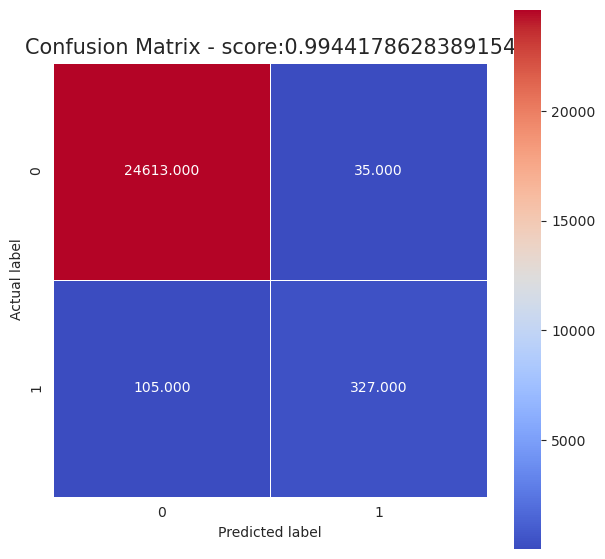

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24648
           1       0.90      0.76      0.82       432

    accuracy                           0.99     25080
   macro avg       0.95      0.88      0.91     25080
weighted avg       0.99      0.99      0.99     25080



In [50]:
# consfusion matrix of svc(rbf) and classification report

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = "coolwarm");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(classification_report(y_test,y_pred))

### ROC AUC Curve

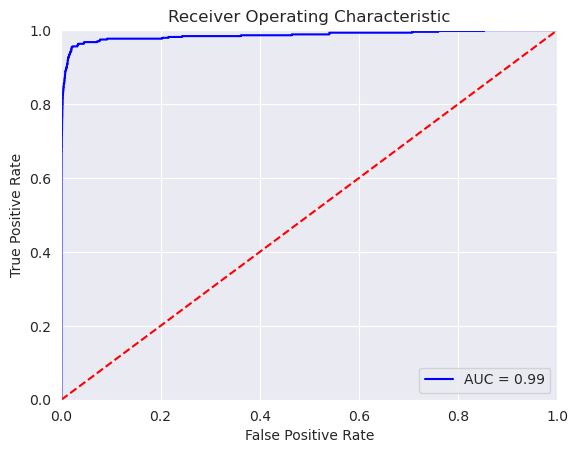

In [55]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = xgb_tune.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()